In [1]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


pre_processing_pipeline = Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer())
])

Wall time: 981 ms


In [2]:
%%time
import pandas as pd

df = pd.read_csv('C:/Users/bodie/Documents/Spreadsheets/emails_not_normalized.csv')

Wall time: 762 ms


In [3]:
Spam_df = df[df['is_spam']==1]

In [4]:
%%time
X = Spam_df['full_text'].tolist()

Wall time: 998 µs


In [5]:
%%time
New_X = pre_processing_pipeline.fit_transform(X)

Wall time: 1.1 s


In [6]:
%%time
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(New_X) 
print(similarities)

[[1.         0.15793361 0.17356792 ... 0.07134964 0.12327336 0.        ]
 [0.15793361 1.         0.67659382 ... 0.02866487 0.35849633 0.        ]
 [0.17356792 0.67659382 1.         ... 0.03181345 0.08037416 0.        ]
 ...
 [0.07134964 0.02866487 0.03181345 ... 1.         0.07199212 0.        ]
 [0.12327336 0.35849633 0.08037416 ... 0.07199212 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
Wall time: 968 ms


In [7]:
print(len(X))

2399


# Kmeans

In [10]:
%%time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


centers = list(range(2,30))
model = KMeans(init='k-means++',random_state=99)

Wall time: 0 ns


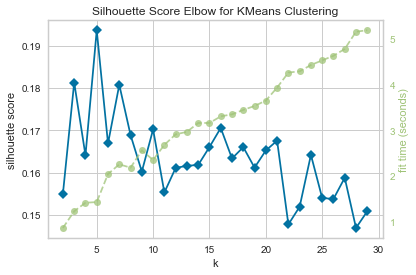

Optimal number of clusters based on silhouette score: [5]
Wall time: 1min 35s


In [25]:
%%time
visualizer = KElbowVisualizer(model, k=centers,metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(similarities)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

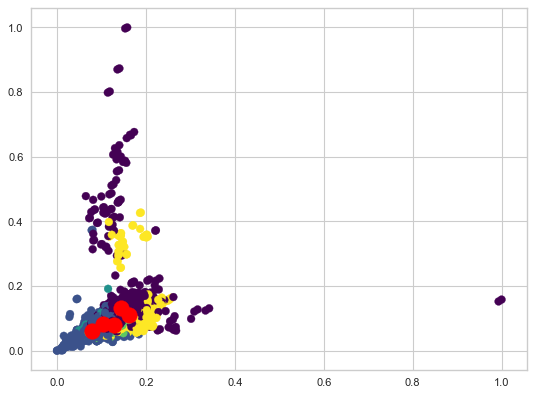

Wall time: 1.82 s


In [34]:
%%time
kmeans = KMeans(n_clusters = 5,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 600,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility


pred_y = kmeans.fit_predict(similarities)



figure(figsize=(8, 6), dpi=80)


plt.scatter(similarities[:, 0], similarities[:, 1],c=pred_y ,s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

# AgglomerativeClustering

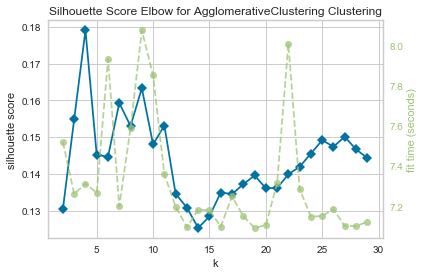

Optimal number of clusters based on silhouette score: [4]
Wall time: 3min 29s


In [40]:
%%time
from sklearn.cluster import AgglomerativeClustering
#Utlized code from  
#https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29
#https://github.com/IDB-FOR-DATASCIENCE/Segmentation-Modelling/blob/main/Segmentation%20Notebook%20_Final.ipynb
from yellowbrick.cluster import KElbowVisualizer

centers = list(range(2,30))


model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=centers,metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(similarities)       
visualizer.show()       

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

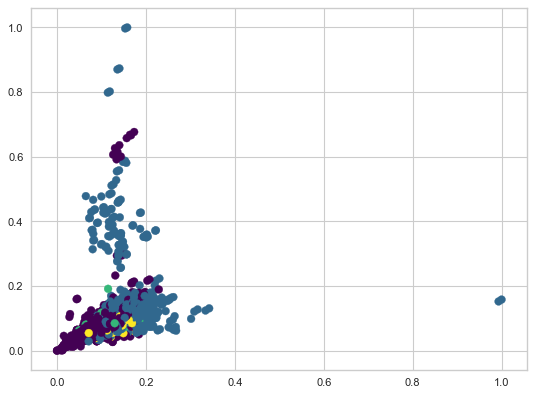

In [41]:
%%time
cls = AgglomerativeClustering(n_clusters=4, linkage='ward')              


pred_y = cls.fit_predict(similarities)



figure(figsize=(8, 6), dpi=80)


plt.scatter(similarities[:, 0], similarities[:, 1],c=pred_y ,s=50, cmap='viridis')
plt.scatter(cls.cluster_centers_[:, 0], 
            cls.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

Highest Score: 0.1746680960358433 at K = 7


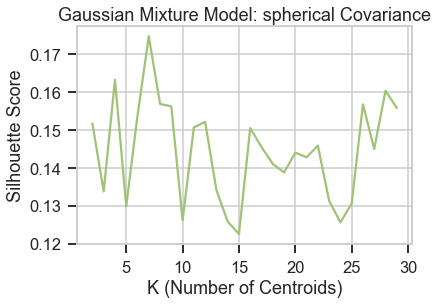

Wall time: 41 s


In [44]:
%%time
# Gassian Mixture Model covariance type: spherical
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
import seaborn as sns

scores = []
K = range(2,30)
for k in K:
    g_co = GaussianMixture(n_components=k, covariance_type='spherical')
    g_fit = g_co.fit(similarities)
    g_pred = g_fit.predict(similarities) 
    sc = silhouette_score(similarities, g_pred)
    scores.append(sc)
    
print("Highest Score:", max(scores), "at K =", scores.index(max(scores))+2) #starting at k=2

sns.set_context("talk")
plt.plot(K, scores, "-g")
plt.xlabel('K (Number of Centroids)')
plt.ylabel('Silhouette Score')
plt.title('Gaussian Mixture Model: spherical Covariance')
plt.show()


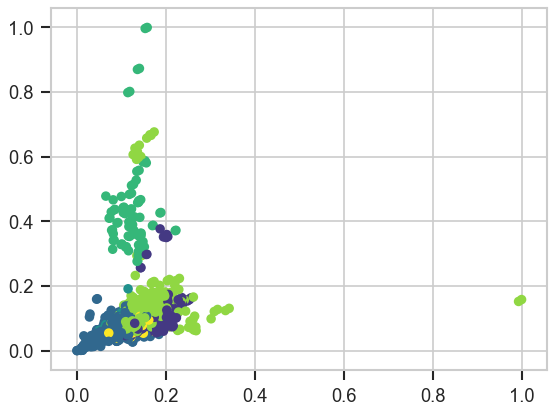

Wall time: 600 ms


In [46]:
%%time
cls = GaussianMixture(n_components=7, covariance_type='spherical')           # Choose random state for reproducibility


pred_y = cls.fit_predict(similarities)



figure(figsize=(8, 6), dpi=80)


plt.scatter(similarities[:, 0], similarities[:, 1],c=pred_y ,s=50, cmap='viridis')
                    # Set centroid color
plt.show()

# old work

In [28]:
%%time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot  as plt

n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(similarities)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)


Wall time: 137 ms
Wall time: 315 ms


Wall time: 37.8 ms


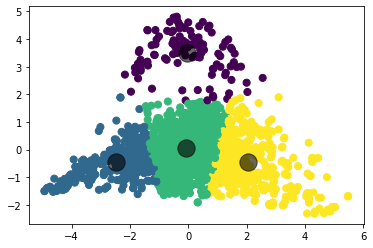

In [29]:
%%time
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)